SOURCE SHEETS

In [1]:
import numpy as np
from matplotlib import pyplot as py
%matplotlib inline

In [3]:
ny, nx = 100, 100
xstart, xend = -1.0, 1.0
ystart, yend = -1.5, 1.5
x = np.linspace(xstart, xend, num=nx)
y = np.linspace(ystart, yend, num=ny)
X, Y = np.meshgrid(x, y)

In [55]:
u_inf = 1.0
u_free = np.ones_like(Y) * u_inf
v_free = np.zeros_like(X)
psi_free = u_inf * Y

In [72]:
class Source:
    def __init__(self, sigma, x, y):
        self.x = x
        self.y = y
        self.sigma = sigma
        
    def velocity(self, X, Y):
        r2 = (X - self.x)**2 + (Y - self.y)**2
        u = (self.sigma / (2.0 * np.pi)) * (X - self.x) / r2
        v = (self.sigma / (2.0 * np.pi)) * (Y - self.y) / r2
        return u, v
    
    def streamfunct(self, X, Y):
        psi = self.sigma / (2 * np.pi) * np.arctan((Y - self.y) / (X - self.x))
        return psi

In [73]:
source1 = Source(1.0, 1.0, 5.0)

In [74]:
print(type(source1))

<class '__main__.Source'>


In [75]:
print(source1.x)
print(source1.y)
print(source1.sigma)

1.0
5.0
1.0


In [84]:
N = 30
total_sigma = 15.0
sigma = total_sigma / N
x_sources = np.zeros(N)
y_sources = np.linspace(-1.0, 1.0, N)
# we will create a 1D array where each element is an instance of our class source

sources = np.empty(N, dtype=object)
#print(type(sources))
#print(sources.dtype)

for i in range(N):
    sources[i] = Source(sigma, x_sources[i], y_sources[i])
    
u = u_free.copy()
v = v_free.copy()
psi = psi_free.copy()

for source in sources:
    u_s, v_s = source.velocity(X, Y)
    
    u += u_s
    v += v_s
    psi_one = source.streamfunct(X, Y)
    psi += psi_one

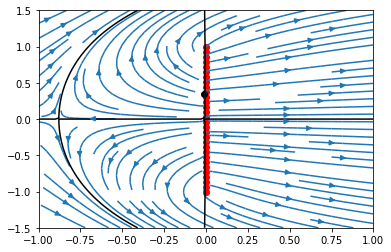

In [85]:
u_total = u + u_free
v_total = v + v_free

psi_free = Y * u_inf

psi_total = psi + psi_free

py.figure()
py.scatter(x_sources, y_sources, color='r')
py.streamplot(X, Y, u_total, v_total)
py.contour(X, Y, psi_total, levels=[0.0], colors ='k')

magn = np.sqrt(u**2 + v**2)
j, i = np.unravel_index(magn.argmin(), magn.shape)
py.scatter(x[i], y[j], color = 'k')

In [86]:
from scipy import integrate

In [87]:
integrate.quad(lambda x: x**2, 0.0, 1.0)

(0.33333333333333337, 3.700743415417189e-15)

In [89]:
integrate.quad(lambda x, a1, a2: a1 * a2 * x**2, 0.0, 1.0, args=(2.0, 3.0))

(2.0, 2.220446049250313e-14)

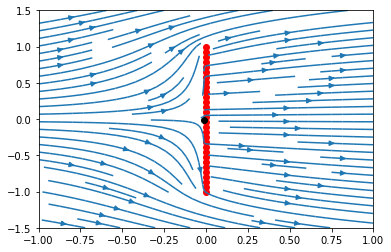

In [107]:
sigma = 2
ymin, ymax = -1.0 , 1.0

integrand_u = lambda s, x, y: x / (x**2 + (y - s)**2)
integrand_v = lambda s, x, y: (y - s) / (x**2 + (y - s)**2)

def integration(x, y, integrand):
    return integrate.quad(integrand, ymin, ymax, args=(x, y))[0]

vec_integration = np.vectorize(integration)

u_sheet = sigma / (2 * np.pi) * vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2 * np.pi) * vec_integration(X, Y, integrand_v)

u = u_free + u_sheet
v = v_free + v_sheet

py.figure()
py.scatter(x_sources, y_sources, color='r')
py.streamplot(X, Y, u, v)
#py.contour(X, Y, psi_total, levels=[0.0], colors ='k')

magn = np.sqrt(u**2 + v**2)
j, i = np.unravel_index(magn.argmin(), magn.shape)
py.scatter(x[i], y[j], color = 'k')
